# Data analysis

### 1) Load datasets from BIN file

In [2]:
import pickle
with open('aida_spotlight.bin', 'rb') as outfile:
    aida_articles=pickle.load(outfile)
with open('wes2015_spotlight.bin', 'rb') as outfile:
    wes_articles=pickle.load(outfile)
    
wes_title='wes2015'
aida_title='aida'

### 2) Distribution of AIDA collections 

In [3]:
from collections import defaultdict

d=defaultdict(int)
for article in aida_articles:
    d[article.collection]+=1
d

defaultdict(int, {'aidatesta': 216, 'aidatestb': 231, 'aidatrain': 946})

### 3) Get frequency distributions of forms and instances

In [4]:
import time
import plot_utils

t1=time.time()
#print(example_article.identifier)
wes_cnt_instances, wes_cnt_forms=plot_utils.get_mention_counts(wes_articles)
aida_cnt_instances, aida_cnt_forms=plot_utils.get_mention_counts(aida_articles)
aida_cnt_instances.pop('--NME--', None)
print(aida_cnt_instances)
t2=time.time()
print(t2-t1)


Counter({'United_States': 636, 'Germany': 354, 'Russia': 308, 'France': 299, 'United_Kingdom': 280, 'London': 234, 'Italy': 215, 'Australia': 204, 'Israel': 194, 'Iraq': 185, 'People\\u0027s_Republic_of_China': 183, 'Spain': 178, 'Netherlands': 160, 'England': 159, 'Japan': 153, 'New_York_City': 144, 'Belgium': 129, 'Sweden': 121, 'Bill_Clinton': 116, 'Reuters': 110, 'Europe': 109, 'Canada': 109, 'Poland': 102, 'India': 100, 'Chechnya': 94, 'Brazil': 93, 'United_Nations': 88, 'Czech_Republic': 87, 'Austria': 86, 'Switzerland': 84, 'Islam': 83, 'England_cricket_team': 82, 'Pakistan_national_cricket_team': 78, 'South_Africa': 78, 'Hong_Kong': 77, 'Moscow': 76, 'Iran': 73, 'Chicago': 72, 'Indonesia': 69, 'Boris_Yeltsin': 68, 'Yasser_Arafat': 68, 'Scotland': 66, 'New_York_Yankees': 66, 'Chicago_White_Sox': 65, 'Greenwich_Mean_Time': 64, 'Alexander_Lebed': 64, 'South_Korea': 63, 'Paris': 60, 'Baltimore_Orioles': 60, 'Los_Angeles_Angels_of_Anaheim': 60, 'Australia_national_cricket_team': 60,

### 4) Plot frequency distribution of FORMS

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**4.1. Linear plots **

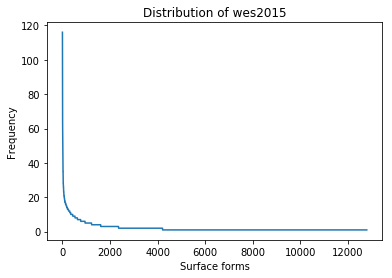

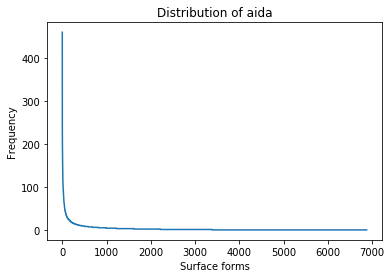

In [4]:
plot_utils.plot_freq_dist(wes_cnt_forms, wes_title, x_axis='Surface forms')
plot_utils.plot_freq_dist(aida_cnt_forms, aida_title, x_axis='Surface forms')

**4.2. Log-log plots**

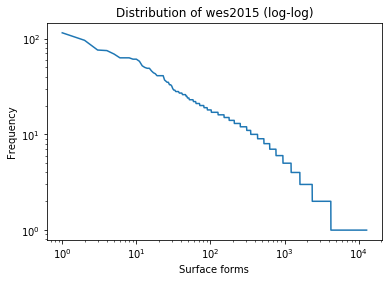

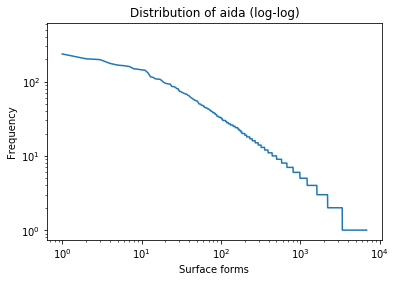

In [5]:
plot_utils.plot_freq_dist(wes_cnt_forms, wes_title, x_axis='Surface forms', loglog=True, b=10)
plot_utils.plot_freq_dist(aida_cnt_forms, aida_title, x_axis='Surface forms', loglog=True, b=10)

**4.3. Slope** 

In [6]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_forms)
wes_slope=plot_utils.calculate_slope(wes_cnt_forms)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0022036164183156324, intercept=11.620965629475819, rvalue=-0.37260300743819236, pvalue=1.8815464484624348e-225, stderr=6.6190701161751247e-05)
LinregressResult(slope=-0.00049347163012393794, intercept=5.3903221820524916, rvalue=-0.46468730737613617, pvalue=0.0, stderr=8.3165696362870735e-06)


### 5) Plot frequency distribution of INSTANCES

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**5.1. Linear plots **

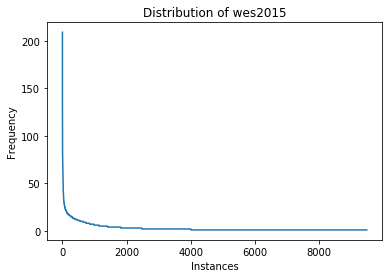

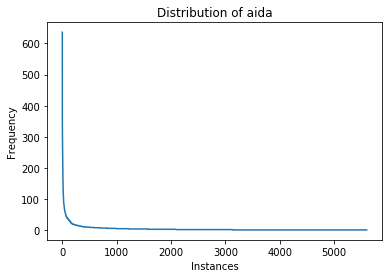

In [7]:
plot_utils.plot_freq_dist(wes_cnt_instances, wes_title, x_axis='Instances')
plot_utils.plot_freq_dist(aida_cnt_instances, aida_title, x_axis='Instances')

**5.2. Log-log plots**

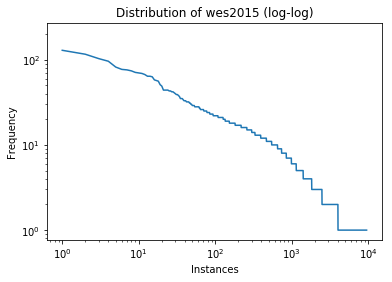

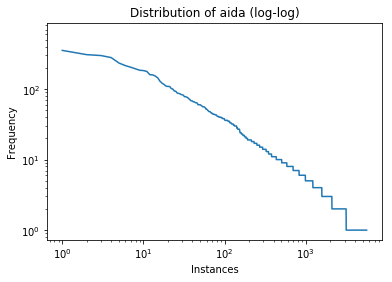

In [8]:
plot_utils.plot_freq_dist(wes_cnt_instances, wes_title, x_axis='Instances', loglog=True, b=10)
plot_utils.plot_freq_dist(aida_cnt_instances, aida_title, x_axis='Instances', loglog=True, b=10)

**5.3. Slope** 

In [9]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_instances)
wes_slope=plot_utils.calculate_slope(wes_cnt_instances)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0034918839274364968, intercept=14.74113327668309, rvalue=-0.33804379109843619, pvalue=1.1032005815953184e-149, stderr=0.00012995643109834956)
LinregressResult(slope=-0.0010437738411112805, intercept=7.9647182552743745, rvalue=-0.49633270133837254, pvalue=0.0, stderr=1.8741711832404709e-05)


### 6) Prepare ambiguity and variance data

In [10]:
interpretations, references = plot_utils.get_interpretations_and_references(aida_articles, skip_nils=True)

### 7) Aggregation per ambiguity

<span style="background-color:lightgreen">Section 5.2. of the paper</span>

In [11]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'Argentine': 1,
 'BUENOS AIRES': 1,
 'VAIL': 1,
 'Colorado': 2,
 'Renate Goetschl': 1,
 'Austria': 4,
 'Lillehammer': 1,
 'Norway': 1,
 'Flachau': 1,
 'World Cup': 12,
 'Iraq': 1,
 'BAGHDAD': 1,
 'Sudanese': 1,
 'Iraqi': 1,
 'Iraqis': 1,
 'Iraqi News Agency': 1,
 'Khartoum': 1,
 'Sudan Airways': 1,
 'Amman': 1,
 'London': 4,
 'Larnaca': 1,
 'Cyprus': 2,
 'Stansted': 2,
 'British': 2,
 'Estonian': 1,
 'TALLINN': 1,
 'Estonia': 2,
 'Lennart Meri': 1,
 'Meri': 1,
 'Soviet Union': 1,
 'Arnold Ruutel': 1,
 'Reform Party': 2,
 'Reuters': 1,
 'Ruutel': 1,
 'Soviet': 1,
 'Lebed': 1,
 'NOVYE ATAGI': 1,
 'Russia': 2,
 'Alexander Lebed': 1,
 'Chechen': 1,
 'Grozny': 1,
 'Chechnya': 1,
 'RUGBY LEAGUE': 2,
 'WIGAN': 2,
 'BRADFORD': 1,
 'England': 6,
 'English': 3,
 'Wigan': 2,
 'Bradford Bulls': 1,
 'S. KOREAN': 1,
 'SEOUL': 1,
 'South Korean': 1,
 'Hanwha': 1,
 'Ecuador': 1,
 'Indians': 3,
 'QUITO': 1,
 'Abdala Bucaram': 1,
 'Bucaram': 1,
 'Indian': 3,
 'MAJOR LEAGUE': 1,
 'NEW YORK': 4,
 'Major 

In [12]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [13]:
agg_per_ambiguity

defaultdict(int, {1: 6400, 2: 359, 3: 78, 4: 29, 5: 7, 6: 3, 12: 1})

### 8) Aggregation per variance

<span style="background-color:lightgreen">Section 5.3. of the paper</span>

In [14]:
variance={}
for meaning,forms in references.items():
    variance[meaning]=len(forms)
variance

{'Argentina': 3,
 'Buenos_Aires': 2,
 'Vail\\u002c_Colorado': 1,
 'Colorado': 2,
 'Renate_G\\u00f6tschl': 1,
 'Austria': 3,
 'Lillehammer': 1,
 'Norway': 3,
 'Flachau': 1,
 'FIS_Alpine_Ski_World_Cup': 1,
 'Iraq': 5,
 'Baghdad': 2,
 'Sudan': 2,
 'National_Iraqi_News_Agency': 1,
 'Khartoum': 2,
 'Sudan_Airways': 1,
 'Amman': 2,
 'London': 3,
 'Larnaca': 2,
 'Cyprus': 1,
 'London_Stansted_Airport': 2,
 'United_Kingdom': 9,
 'Estonia': 2,
 'Tallinn': 1,
 'Lennart_Meri': 2,
 'Soviet_Union': 2,
 'Arnold_R\\u00fc\\u00fctel': 2,
 'Estonian_Reform_Party': 1,
 'Reuters': 2,
 'Alexander_Lebed': 2,
 'Novye_Atagi': 2,
 'Russia': 7,
 'Chechnya': 4,
 'Grozny': 2,
 'Rugby_league': 1,
 'Wigan_Warriors': 2,
 'Bradford_Bulls': 3,
 'Wigan': 1,
 'England': 7,
 'South_Korea': 10,
 'Seoul': 2,
 'Hanwha_Eagles': 1,
 'Ecuador': 1,
 'Indigenous_peoples_of_the_Americas': 2,
 'Quito': 1,
 'Abdal\\u00e1_Bucaram': 2,
 'Major_League_Baseball': 3,
 'New_York_City': 7,
 'American_League_East': 4,
 'New_York_Yankees': 

In [15]:
agg_per_variance=defaultdict(int)
for uri, v in variance.items():
    agg_per_variance[v]+=1

In [16]:
agg_per_variance

defaultdict(int,
            {1: 4156,
             2: 1118,
             3: 230,
             4: 56,
             5: 19,
             6: 10,
             7: 6,
             9: 1,
             10: 1,
             11: 1})

### 9) Correlation between frequency of forms and ambiguity

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

1 1.0
2 1.0477815699658704
3 1.0827702702702702
4 1.1075
5 1.1551724137931034
6 1.1306818181818181
7 1.2222222222222223
8 1.25
9 1.2625
10 1.3333333333333333
11 1.52
12 1.4594594594594594
13 1.4
14 1.4
15 1.32
16 1.6363636363636365
17 1.411764705882353
18 1.6
19 1.7272727272727273
20 1.3125
21 2.3333333333333335
22 1.4444444444444444
23 1.6666666666666667
24 1.75
25 1.7777777777777777
26 1.7
27 2.0
28 2.3333333333333335
29 2.0
30 2.2222222222222223
31 2.5
32 1.3333333333333333
33 1.5
34 3.0
35 1.0
36 3.3333333333333335
37 2.5
38 2.0
39 2.0
40 2.0
41 3.5
42 4.5
43 2.0
44 1.6666666666666667
45 3.3333333333333335
47 1.5
48 2.0
49 1.0
50 1.6666666666666667
52 2.0
54 1.0
55 2.5
56 3.0
57 2.0
58 3.0
59 2.0
60 5.0
61 1.0
62 1.0
64 1.0
65 3.0
66 3.0
68 2.5
69 12.0
70 4.0
71 3.0
72 4.0
74 2.5
80 2.0
83 3.0
85 6.0
86 2.0
93 1.5
94 4.0
95 3.0
98 1.0
103 2.0
108 2.5
109 1.0
114 4.0
116 2.0
132 3.0
143 4.0
144 2.0
147 1.0
149 4.0
160 3.0
164 1.0
167 2.0
176 6.0
198 3.0
203 4.0
236 5.0
460 2.0


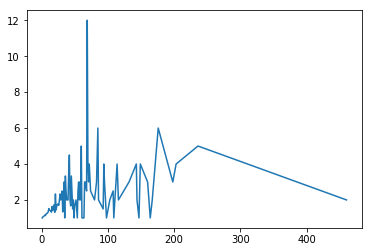

In [17]:
plot_utils.frequency_correlation(aida_cnt_forms, ambiguity)

### 10) Correlation between frequency of instances and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

1 1.0
2 1.2593659942363113
3 1.3996138996138996
4 1.4504249291784703
5 1.7253218884120172
6 1.7267080745341614
7 1.703125
8 1.761061946902655
9 1.9367088607594938
10 1.7777777777777777
11 1.7962962962962963
12 2.3548387096774195
13 2.260869565217391
14 1.9666666666666666
15 2.0833333333333335
16 2.05
17 2.1578947368421053
18 2.411764705882353
19 2.409090909090909
20 2.0
21 2.25
22 3.0
23 2.5714285714285716
24 2.0
25 3.0
26 3.0
27 2.25
28 4.5
30 2.6666666666666665
31 2.5
32 1.6666666666666667
33 2.8
34 3.5
35 3.4
36 3.2222222222222223
37 4.0
38 3.6
39 3.5
40 4.0
41 4.75
42 2.0
43 2.5
44 2.25
45 4.0
46 4.5
47 4.0
48 2.6666666666666665
49 2.0
50 3.0
51 5.0
52 3.0
54 5.0
55 3.0
56 3.0
57 2.0
58 2.0
59 3.0
60 4.75
63 10.0
64 1.5
65 4.0
66 4.5
68 2.5
69 3.0
72 2.0
73 3.0
76 2.0
77 3.0
78 2.5
82 3.0
83 5.0
84 3.0
86 3.0
87 3.0
88 3.0
93 6.0
94 4.0
100 3.0
102 4.0
109 4.5
110 2.0
116 2.0
121 6.0
129 3.0
144 7.0
153 4.0
159 7.0
160 7.0
178 5.0
183 3.0
185 5.0
194 4.0
204 6.0
215 6.0
234 3.0
280

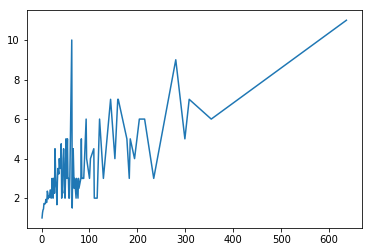

In [18]:
plot_utils.frequency_correlation(aida_cnt_instances, variance)

### 11) Inspection of the distribution within the forms of a single instance

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [19]:
instance='United_States' # this is both the instance with max variance and max frequency

refs=plot_utils.get_instance_distribution(aida_articles, instance)

refs

[('U.S.', 458),
 ('United States', 79),
 ('American', 55),
 ('America', 12),
 ('U.S', 9),
 ('Americans', 7),
 ('Washington', 7),
 ('USA', 5),
 ('U.S.-based', 2),
 ('UNITED STATES', 1),
 ('AMERICAN', 1)]

### 12) Inspection of the distribution within the instances of a single form

In [20]:
form='World Cup' # this is the form with max ambiguity (of 12) in our dataset

insts=plot_utils.get_form_distribution(aida_articles, form)

insts

[('1998_FIFA_World_Cup', 19),
 ('FIFA_World_Cup', 15),
 ('FIS_Alpine_Ski_World_Cup', 9),
 ('UCI_Road_World_Cup', 5),
 ('FIS_Freestyle_Skiing_World_Cup', 5),
 ('Cricket_World_Cup', 5),
 ('Biathlon_World_Cup', 3),
 ('FIS_Ski_Jumping_World_Cup', 2),
 ('Rugby_World_Cup', 2),
 ('1995_Rugby_World_Cup', 2),
 ('World_Cup_of_Hockey', 1),
 ('Speed_Skating_World_Cup', 1)]